<a href="https://colab.research.google.com/github/WanyaKruk/DZ-3/blob/main/DB_Drivers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd
data = pd.read_csv('data_encoded.csv')
data

,year,sex,region,quantity
0,2008,Оба пола,Республика Беларусь,237356.0
1,2008,Оба пола,Брестская область,51979.0
2,2008,Оба пола,Витебская область,42909.0
3,2008,Оба пола,Гомельская область,68010.0
4,2008,Оба пола,Гродненская область,13608.0
...,...,...,...,...
379,2023,Мужчины,Гомельская область,NaN
380,2023,Мужчины,Гродненская область,NaN
381,2023,Мужчины,г. Минск,NaN
382,2023,Мужчины,Минская область,NaN


In [2]:
conn = sqlite3.connect('drivers.db')
cursor = conn.cursor()

In [3]:
cursor.execute('''CREATE TABLE IF NOT EXISTS drivers (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    year INTEGER,
    sex TEXT,
    region TEXT,
    quantity INTEGER
)''')
conn.commit()

In [4]:
df = [tuple(x) for x in data.to_numpy()]
cursor.executemany('''
INSERT INTO drivers (year, sex, region, quantity)
VALUES (?, ?, ?, ?)
''', df)
conn.commit()

In [6]:
cursor.execute("SELECT * FROM drivers")
drivers = cursor.fetchall()
for driver in drivers:
    print(driver)
conn.commit()

(1, 2008, 'Оба пола', 'Республика Беларусь', 237356)
(2, 2008, 'Оба пола', 'Брестская область', 51979)
(3, 2008, 'Оба пола', 'Витебская область', 42909)
(4, 2008, 'Оба пола', 'Гомельская область', 68010)
(5, 2008, 'Оба пола', 'Гродненская область', 13608)
(6, 2008, 'Оба пола', 'г. Минск', 10066)
(7, 2008, 'Оба пола', 'Минская область', 13169)
(8, 2008, 'Оба пола', 'Могилевская область', 37615)
(9, 2008, 'Женщины', 'Республика Беларусь', 63744)
(10, 2008, 'Женщины', 'Брестская область', 14107)
(11, 2008, 'Женщины', 'Витебская область', 9771)
(12, 2008, 'Женщины', 'Гомельская область', 15562)
(13, 2008, 'Женщины', 'Гродненская область', 6904)
(14, 2008, 'Женщины', 'г. Минск', 4661)
(15, 2008, 'Женщины', 'Минская область', 3863)
(16, 2008, 'Женщины', 'Могилевская область', 8876)
(17, 2008, 'Мужчины', 'Республика Беларусь', 173612)
(18, 2008, 'Мужчины', 'Брестская область', 37872)
(19, 2008, 'Мужчины', 'Витебская область', 33138)
(20, 2008, 'Мужчины', 'Гомельская область', 52448)
(21, 2008

In [10]:
cursor.execute("SELECT year, quantity FROM drivers WHERE quantity > 300000")
drivers = cursor.fetchall()
for driver in drivers:
    print(driver)
conn.commit()

(2011, 476377)
(2011, 353464)
(2012, 426043)
(2021, 519256)
(2021, 368757)
(2022, 555119)
(2022, 367083)
(2023, 405527)


In [13]:
cursor.execute('''
SELECT SUM(quantity) FROM drivers WHERE year = 2015
''')
result = cursor.fetchone()
print(result)
conn.commit()

(1017416,)


In [14]:
cursor.execute('''
SELECT AVG(quantity) FROM drivers WHERE year = 2010
''')
result = cursor.fetchone()
print(result)
conn.commit()


(46094.5,)


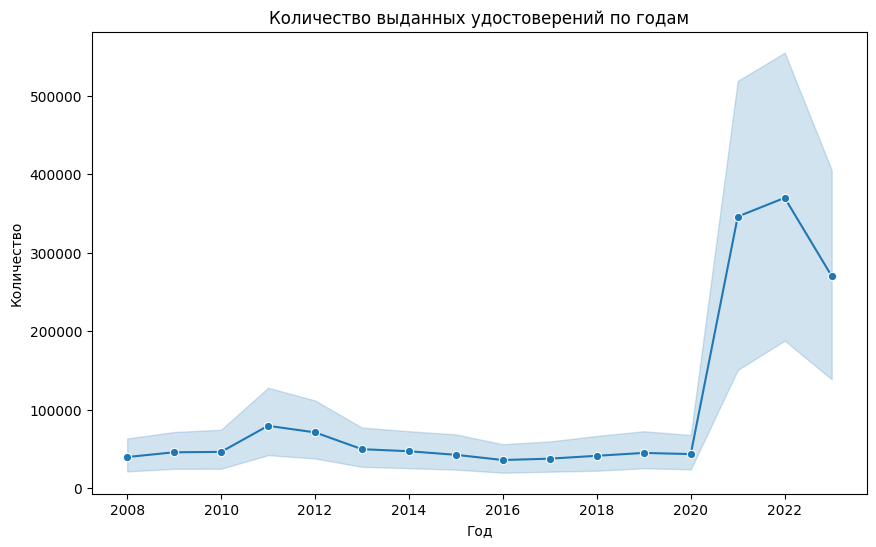

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='quantity', marker='o')
plt.title('Количество выданных удостоверений по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

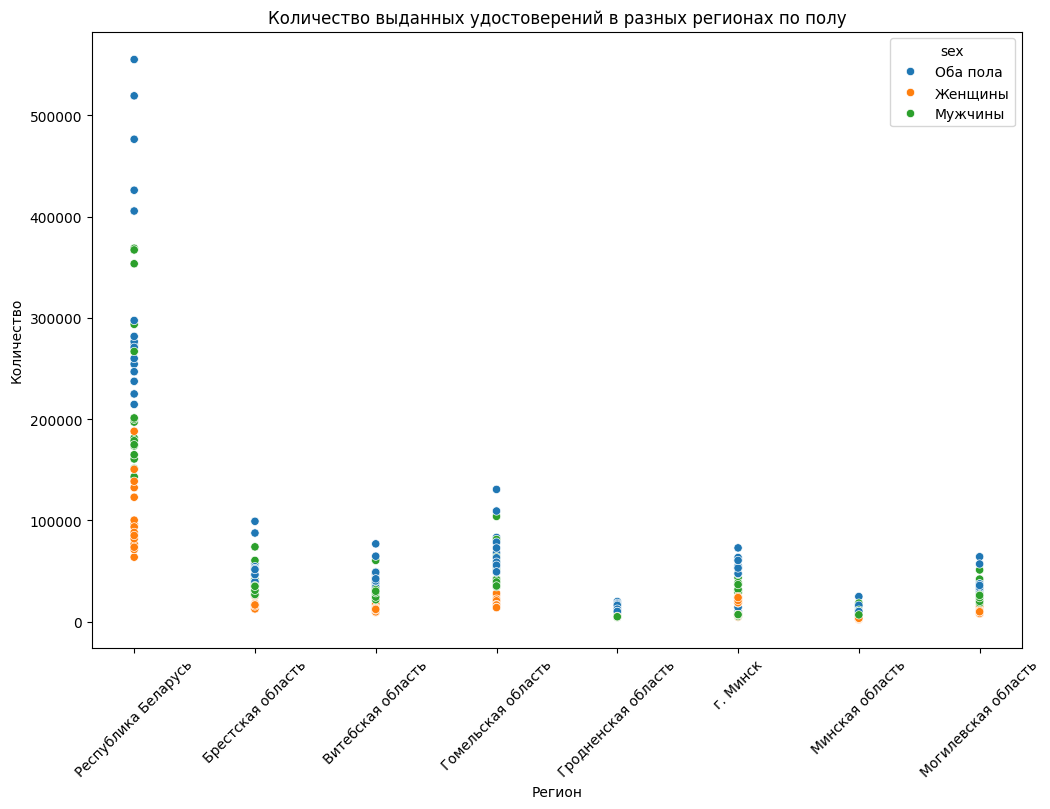

In [39]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='region', y='quantity', hue='sex')
plt.title('Количество выданных удостоверений в разных регионах по полу')
plt.xlabel('Регион')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()